Description
Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# importing all of the libraries that I might need

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the CSV and also creating a copy to work with
# After initial head() viewing, added index_col = 0 to get rid of the duplicate column labeling between CSV and pandas 
data = pd.read_csv('used_cars_data.csv', index_col = 0)
df = data.copy()

In [4]:
# adjusting the auto display features on the number of rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)

In [5]:
# look at the top 10 header
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20


** Notice a lot of NaN values in the Column: "New_Price"   
and also contains e.g. 21 Lakh which indicates these will be str string values and require preprocessing **
Same for the Mileage Column which also had different units: kmpl and km/kg

In [6]:
df.tail(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
7243,Renault Duster 85PS Diesel RxL,Chennai,2015,70000,Diesel,Manual,First,19.87 kmpl,1461 CC,83.8 bhp,5.0,NaN,NaN
7244,Chevrolet Aveo 1.4 LS,Pune,2009,45463,Petrol,Manual,First,14.49 kmpl,1399 CC,92.7 bhp,5.0,NaN,NaN
7245,Honda Amaze S i-Vtech,Kochi,2015,44776,Petrol,Manual,First,18.0 kmpl,1198 CC,86.7 bhp,5.0,NaN,NaN
7246,Hyundai Grand i10 AT Asta,Coimbatore,2016,18242,Petrol,Automatic,First,18.9 kmpl,1197 CC,82 bhp,5.0,NaN,NaN
7247,Hyundai EON D Lite Plus,Coimbatore,2015,21190,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN,NaN
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


## Lots of NaN values in the 'Price' column also 
### Will need to modify columns "Mileage, Engine, Power" to remove letters and convert to a float

In [7]:
# looking at 10 random rows of data 
np.random.seed(1)
df.sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50


In [8]:
df.info()
# lots of object Data Types - will need to process some and convert to int/float - other will just need to be converted to Category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [9]:
df['Name'].nunique()

2041

In [10]:
df.shape
# 7253 rows
# 13 columns

(7253, 13)

In [11]:
df.describe()
# checking the numerical stats - will need to re-run once certain columns are corrected

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [12]:
df.isnull().sum()
# 46 null values in Engine and Power Column - indicates there is some similar discrepancies in these two columns
# 53 Nulls in Seats - It might be possible to fill these in by cross-reference to same car models or Median values
# Very Large Null value in New_price - possibly delete this column? 
# Large number of Nulls in Price column - will require further investigation to process 

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [13]:
# we will replace missing values in every column with its medain
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)


In [14]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                   0
New_Price            6247
Price                   0
dtype: int64

In [15]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7253.000000,7253.000000
mean,2013.365366,5.869906e+04,5.277678,8.826235
std,3.254421,8.442772e+04,0.809039,10.293313
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.850000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,8.400000
max,2019.000000,6.500000e+06,10.000000,160.000000


# Preprocessing

Looking at Column "Name": We want to create a new column with only the first two Words in the string.
NOTE: We might need to refine later depending on how the categories work out (for example there are different Mercedes-Benz E-Classes
E200 and E250, but for now, let's try sorting by only Mercedes-Benz E-class for now 

In [16]:
# defining a function to take in the cell contents and Return the first two Words as a String (str)
def carname_to_category(name1):
    temp = name1.split(' ')[0:2] # split by spaces and return only the first two words (will be in a List)
    return(str(temp[0]+' '+temp[1])) # Concatenate the first two values in the temp List and Return 

# After hot-key and building train/test - coming back and removing Car_model and will keep Brand_Name (i.e. only Ford, Chevy etc)

In [17]:
# # using the apply() method to apply the carname_to_category() function and create a new Series 'Car_Model'
# df['Car_Model'] = df.Name.apply(carname_to_category)

In [18]:
# # Convert the New Series/Column to a Category to help analysis 
# df['Car_Model'] = pd.Categorical(df.Car_Model)

Splitting Car 'Name' column into just the Brand Name

In [19]:
# defining a function to take in the cell contents and Return the first Word as a String (str)
# Building a column with only brand name (e.g. Ford, BMW, etc.)
def carname_to_brand(name1):
    temp = name1.split(' ')[0:1] # split by spaces and return only the first word (will be in a List)
    return(str(temp[0])) # Return 

In [20]:
# using the apply() method to apply the carname_to_category() function and create a new Series 'Car_Model'
df['Brand_Name'] = df.Name.apply(carname_to_brand)

In [21]:
def fix_isuzu(name):
    if name == 'ISUZU':
        return('Isuzu')
    else:
        return(name)

In [22]:
df['Brand_Name'] = df.Brand_Name.apply(fix_isuzu)

In [23]:
# Convert the New Series/Column to a Category to help analysis 
df['Brand_Name'] = pd.Categorical(df.Brand_Name)

In [24]:
# no null values in Location - looks good to convert to category
# 11 unique locations; this will be good to group data by
df['Location'] = pd.Categorical(df.Location)
df['Location'].nunique()

11

Year and Kilometers Driven Columns look good - will leave them int64 dtype

In [25]:
# Fuel Type looks good - convert to Category
# only 5 types - will be good for sorting
df['Fuel_Type'] = pd.Categorical(df.Fuel_Type)
df['Fuel_Type'].nunique()

5

In [26]:
# Transmission looks good - convert to Category
# only 5 types - will be good for sorting
# later, we might need to hot-key this to 1's and 0's with df['Transmission_Binary'] = df.Transmission.map({'Manual':1,'Automatic':0}) 
df['Transmission'] = pd.Categorical(df.Transmission)
df['Transmission'].nunique()

2

In [27]:
# convert Owner_Type to Category and check number of uniques
# maybe later, we will convert to integers (e.g. 1, 2, 3, and 4+), but for now, we'll leave it. 
df['Owner_Type'] = pd.Categorical(df.Owner_Type)
df['Owner_Type'].nunique()

4

# For Mileage - The analysis may get really messy due to having 4 fuel types and therefore different mileage units (km/kg CNG / LPG - kmpl Diesel/Petro)
# for now, we will just separate the numerical value into a new column 
# That way we can sort by each fuel_type and compare mileage/pricing for ea category of fuel

In [28]:
# defining a function to take in the cell contents and Return the first numbers before space as a float 
# (e.g. pullout only '19.87' from 19.87 kmpl and convert to a float)
# Note, there are some 0.0 values - so we need to handle that as a NaN 
def mileage_to_float(value):
    temp = str(value).split(' ')[0:2] # split by spaces and return only the first two words (will be in a List)
    if float(temp[0]) > 1 and not None: # if non-null and greater than 1, keep it
        return(float(temp[0])) # Concatenate the first two values in the temp List and Return
    else:
        return(np.nan) # else return NaN 

In [29]:
# running the method 'mileage_to_float' to each value in Mileage column 
# and then apply to a newly made column 'Numerical_Mileage'
df['Numerical_Mileage'] = df['Mileage'].apply(mileage_to_float)
df['Numerical_Mileage'] = df['Numerical_Mileage'].apply(pd.to_numeric) #convert to numbers

In [30]:
# create new column 'Engine_Size' by running method on ea value in 'Engine'
df['Engine_Size'] = df['Engine'].apply(mileage_to_float)
df['Engine_Size'] = df['Engine_Size'].apply(pd.to_numeric) #convert to numbers

In [31]:
# after initially trying to convert 'Power' to just a float number, I was getting an error b/c of a 'null' string in some values
# this method goes through and converts each value to a string, then checks for that null
# then return either np.nan or keep the original value
def remove_null_string(value):
    if str(value).startswith('null'):
        return(np.nan)
    else:
        return(value)

In [32]:
df['Horsepower'] = df['Power'].apply(remove_null_string) # check for that null value - described above in remove_null_string method
df['Horsepower'] = df['Horsepower'].apply(mileage_to_float) # convert to float and remove letters after spaces
df['Horsepower'] = df['Horsepower'].apply(pd.to_numeric) #convert Dtype to float64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   object  
 8   Engine             7207 non-null   object  
 9   Power              7207 non-null   object  
 10  Seats              7253 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              7253 non-null   float64 
 13  Brand_Name         7253 non-null   category
 14  Numerical_Mileage  7170 non-null   float64 
 15  Engine_Size        7207 non-null   float64 
 16  Horsep

# Looking at New_Price and Price Columns - Most of the NaN values are in the New_Price. All of the New_Price are higher than the corresponding Price Column - Therefore, the New_Price must be the price of the car when NEW, which is irrelavent to this analysis
# Based on this, I will ignore the New_Price column - and drop it from df

In [34]:
# dropping "New_Price" Column from the copy of dataframe
df.drop(['New_Price'], axis=1, inplace=True)

In [35]:
# Kept having error with Train/Test Function b/c the rows didn't match up after fixing the data - so re-running this MedianFiller
# we will replace missing values in every column with its medain
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

Google Search - for understanding the Pricing Values in Lakh

A lakh (/læk, lɑːk/; abbreviated L; sometimes written lac[1]) is a unit in the Indian numbering system equal to one hundred thousand (100,000; scientific notation: 105). - Therefore, 1 Lakh is equal to 100,000 Indian Rupees

# End of Data Preprocessing for Now - Might have to revisit

# EDA

In [36]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name,Numerical_Mileage,Engine_Size,Horsepower
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,15.20,1968.0,140.80


In [37]:
df.shape
# Now 7253 Rows and 16 Columns

(7253, 16)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   object  
 8   Engine             7207 non-null   object  
 9   Power              7207 non-null   object  
 10  Seats              7253 non-null   float64 
 11  Price              7253 non-null   float64 
 12  Brand_Name         7253 non-null   category
 13  Numerical_Mileage  7253 non-null   float64 
 14  Engine_Size        7253 non-null   float64 
 15  Horsepower         7253 non-null   float64 
dtypes: cat

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.00
Seats,7253.0,5.277678,0.809039,0.00,5.00,5.00,5.00,10.00
Price,7253.0,8.826235,10.293313,0.44,3.85,5.64,8.40,160.00
Numerical_Mileage,7253.0,18.344850,4.134077,6.40,15.40,18.20,21.10,33.54
Engine_Size,7253.0,1615.789742,593.475257,72.00,1198.00,1493.00,1968.00,5998.00
Horsepower,7253.0,112.312448,52.922581,34.20,77.00,94.00,138.03,616.00


Kilometers_Drive - Large outlier for Max Value, 6,500,000 km equates to 4,037,878 miles!! - maybe a typo? 
Seats - 5 covers 50% of distribution with avg 5.3; this will likely be non-factor for pricing
Price - Right Skewed 
Engine_Size - lots of smaller engines (e.g. 1500 cc == 1.5 L) 
Horsepower - Mostly around 100 hp

In [40]:
# Coming back after initial EDA and addressing this outlier
# It is a 2017 vehicle, so let's dive deeper 
df[df['Kilometers_Driven'] == 6500000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name,Numerical_Mileage,Engine_Size,Horsepower
S.No.,,,,,,,,,,,,,,,,
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.0,BMW,15.97,2993.0,258.0


<AxesSubplot:xlabel='Kilometers_Driven'>

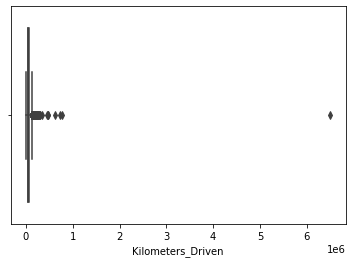

In [41]:
# verifying that the KM-driven outlier is really far away from the other data
sns.boxplot(df['Kilometers_Driven'])

In [42]:
# To be certain, let's check the Z-Score: z = (x-xbar) / sigma
km_driven_zscore = (6500000 - df['Kilometers_Driven'].mean())/np.std(df['Kilometers_Driven'])

In [43]:
# Z-Score is 76, which is much greater than 3 - therefore let's remove it
km_driven_zscore

76.29893336250686

In [44]:
# Outlier is a 2017 car, so let's see what the median km_driven for 2017 vehicles
df[df['Year']==2017]['Kilometers_Driven'].median()
# 29000 median - so let's replace the outlier

29000.0

In [45]:
# replace the 6500000 outlier with the median 29000
df['Kilometers_Driven'] = df['Kilometers_Driven'].replace({6500000 : 29000})

In [46]:
# double check that it copied correctly
df.iloc[2328]

Name                 BMW X5 xDrive 30d M Sport
Location                               Chennai
Year                                      2017
Kilometers_Driven                        29000
Fuel_Type                               Diesel
Transmission                         Automatic
Owner_Type                               First
Mileage                             15.97 kmpl
Engine                                 2993 CC
Power                                  258 bhp
Seats                                      5.0
Price                                     65.0
Brand_Name                                 BMW
Numerical_Mileage                        15.97
Engine_Size                             2993.0
Horsepower                               258.0
Name: 2328, dtype: object

In [47]:
df.describe(include=['category']).T

,count,unique,top,freq
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952
Brand_Name,7253,32,Maruti,1444


Mumbai, diesel, Manual, First and Maruti Swift - Top Categories

In [48]:
# defining a function to plot boxplot above a histogram - plus formatting the background, size and colors
def histogram_boxplot(feature, figsize=(15,10), bins=None):
    f2, (ax_box2, ax_hist2, ) = plt.subplots(nrows = 2, # number of rows of the subplot grid
                                          sharex = False, #x-axis will NOT be shared among subplots
                                          gridspec_kw = {"height_ratios": (.25, .75)},
                                          figsize = figsize
                                          ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='navy') # boxplot will be created and a triangle will show the mean
    sns.distplot(feature, kde=False, ax=ax_hist2, bins = bins, color="navy") if bins else sns.distplot(feature, kde=False, color = 'navy')
    ax_hist2.axvline(np.mean(feature), color='blue', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') #Add median to histogram
    ax_box2.set_facecolor("whitesmoke") #adding a background color to boxplot
    ax_hist2.set_facecolor("whitesmoke") #adding a background color to histogram

In [49]:
# put together a list with all of the numerical columns
number_columns = []
for ea in df.describe().columns:
    number_columns.append(ea)

In [50]:
# build a list with all of the categorical columns
category_columns = []
for ea in df.describe(include=['category']).columns:
    category_columns.append(ea)

In [51]:
category_columns

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand_Name']

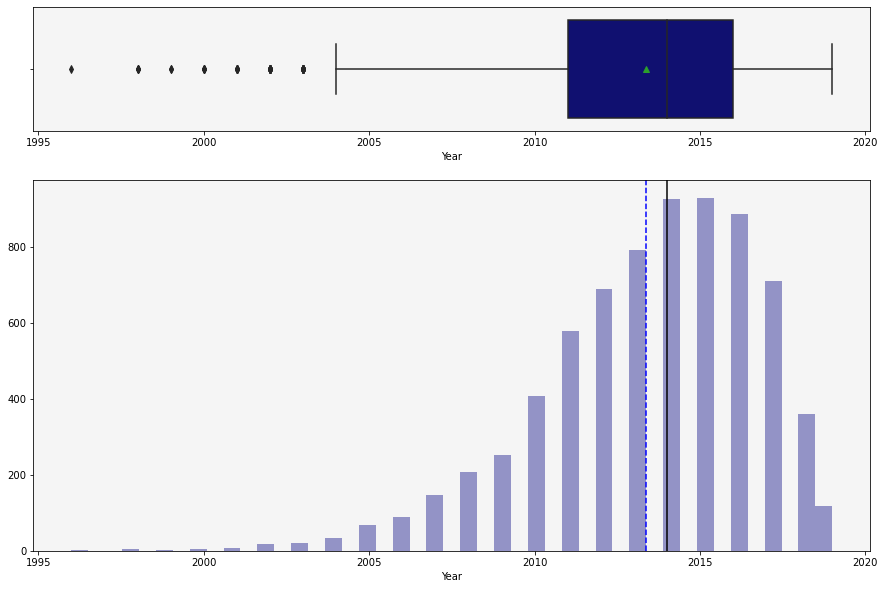

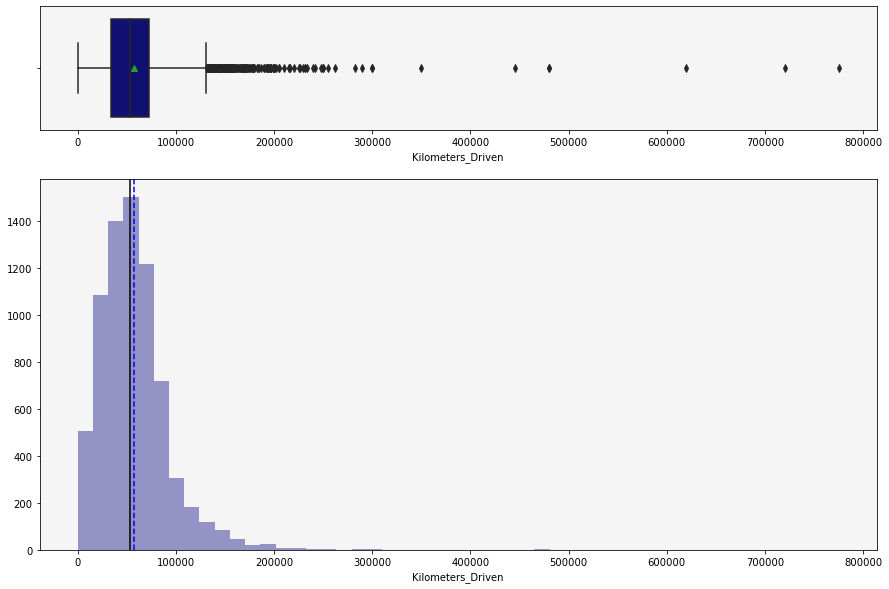

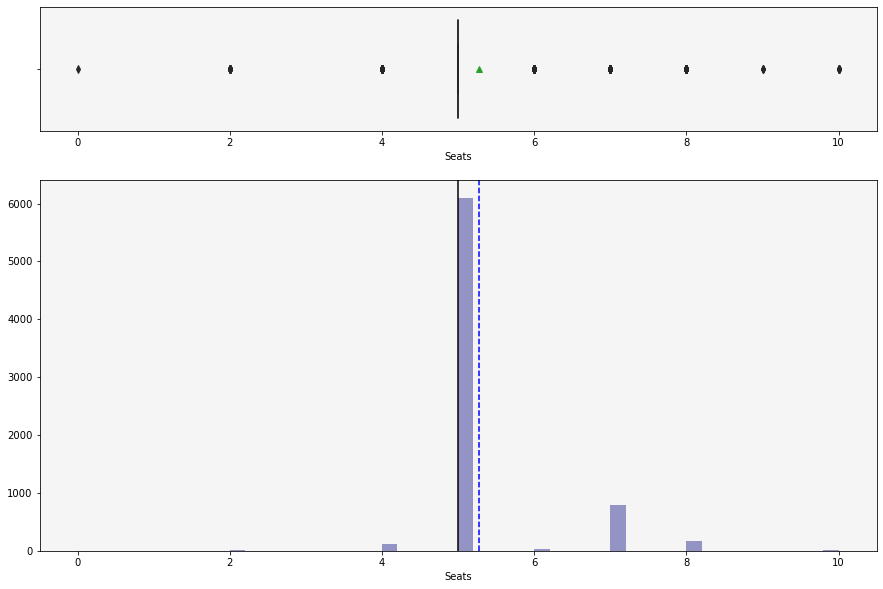

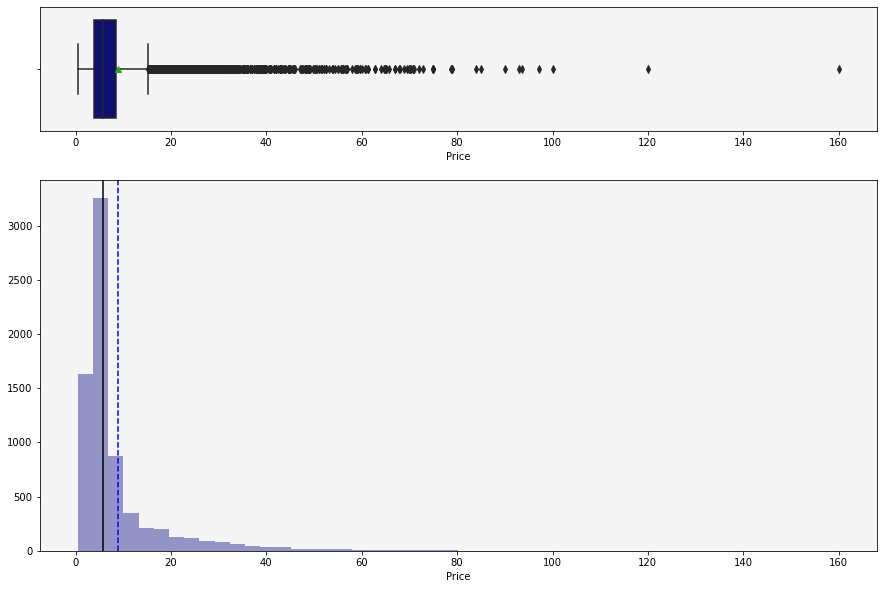

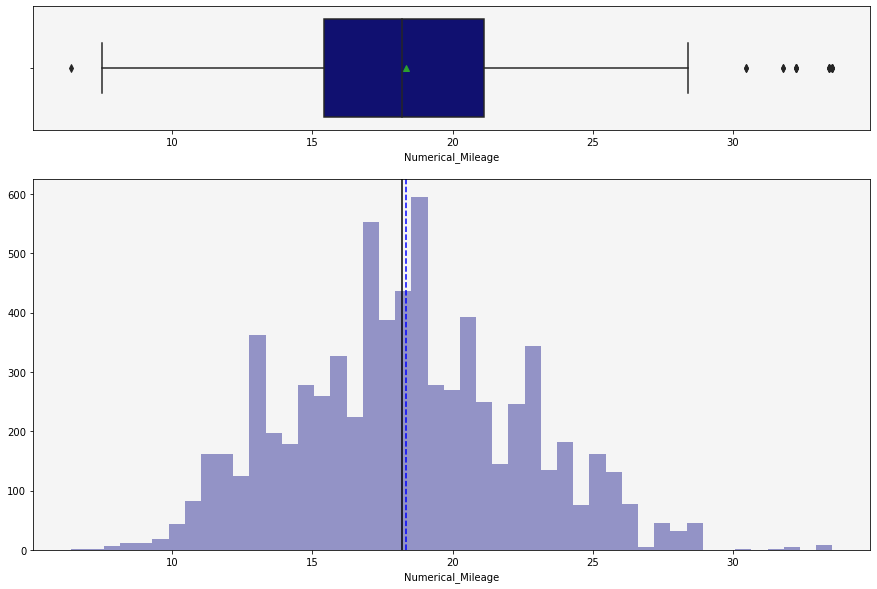

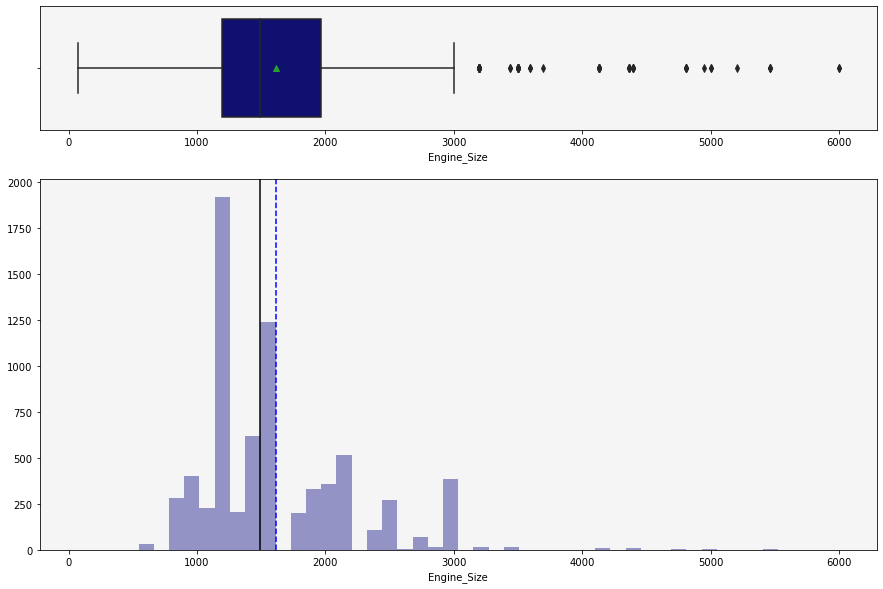

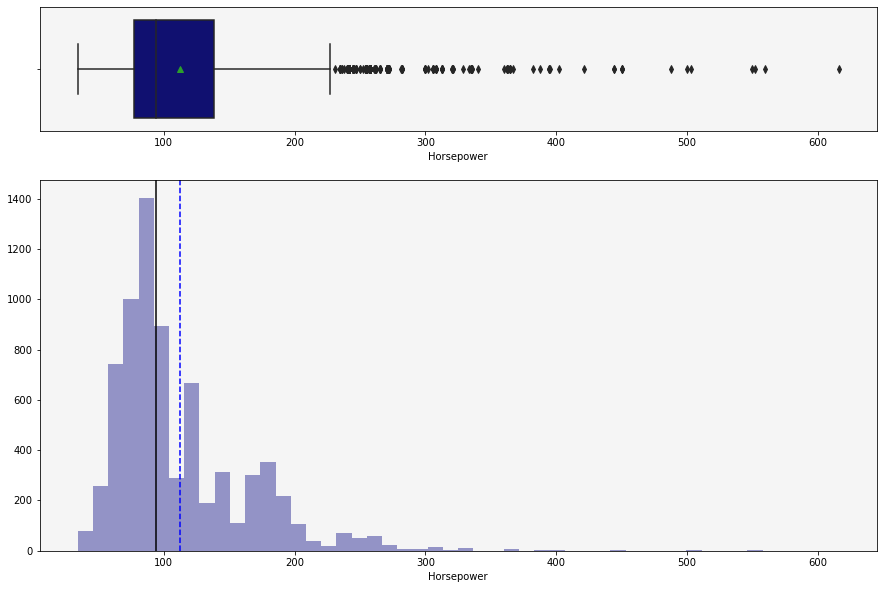

In [52]:
# running a loop through the numerical columns list and plotting the boxplot/distplots 
for each in number_columns:
    plt.show()
    histogram_boxplot(df[each]) # for each column, run the histogram_boxplot function 

Year - skewed left

km driven - one extremely large outlier; will likely delete or change to a median value: Update, did change to 29000

Seats - Mostly 5 seaters

Price - right skewed (DEPENDENT VARIABLE) - good to see no zero or negative values in the data - lots of outliers

Mileage - appears to be an even bell curve distribution

Engine Size - right skewed 

HP - right skewed (very similar pattern to Engine Size which makes sense intuitively) 


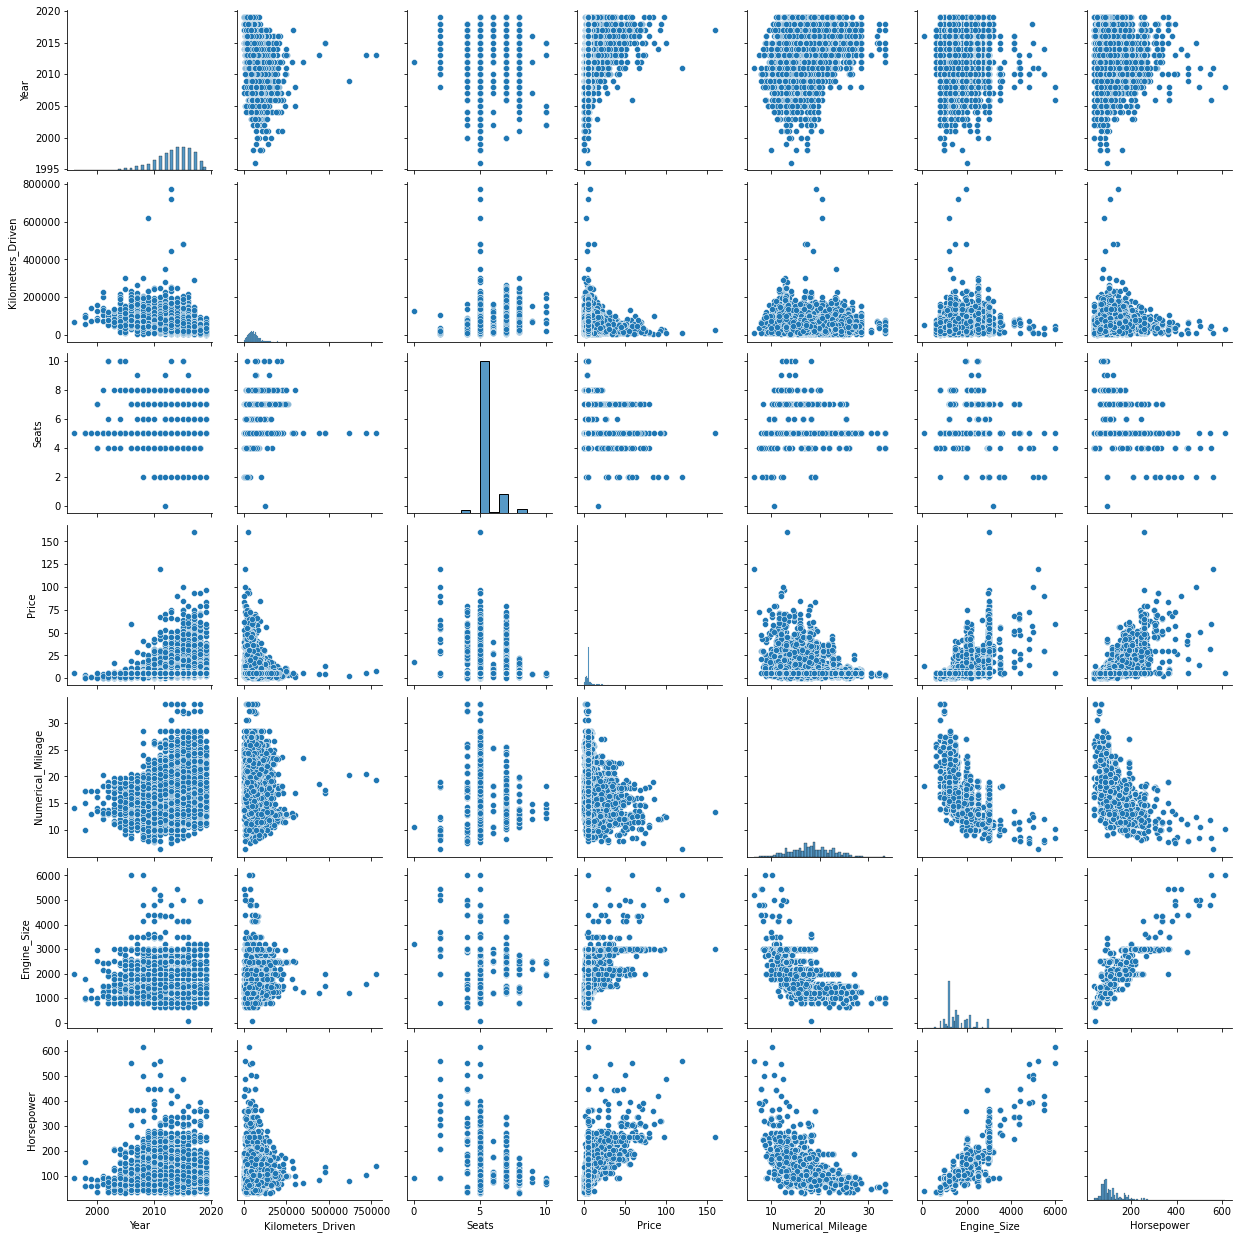

In [53]:
sns.pairplot(df)

From Pairplot: 

Year vs Price - appears to be a positive correlation
Mileage vs Price - appears to be negative correlation
Engine_Size vs Price appears to be a positive correlation
km driven vs Price - possible negative correlation but the scale is too small (probably due to the huge outlier) 
 Update: km driven vs Price - can now see negative correlation once outlier was fixed



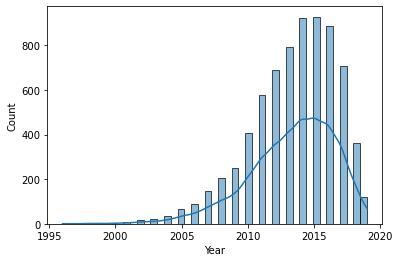

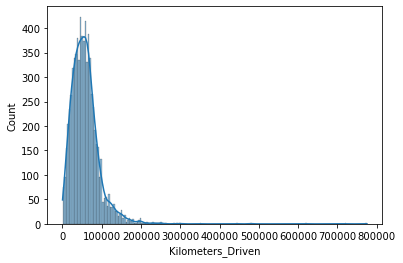

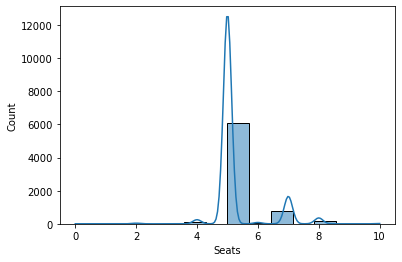

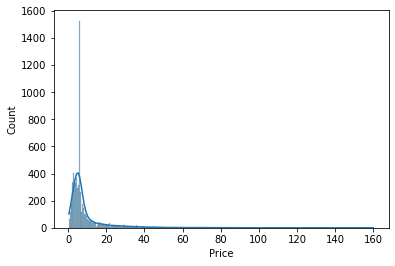

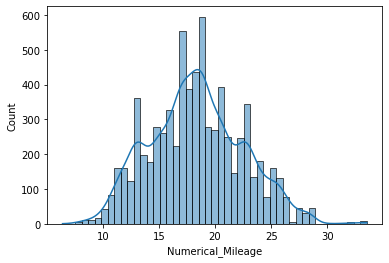

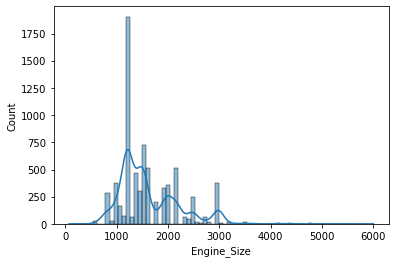

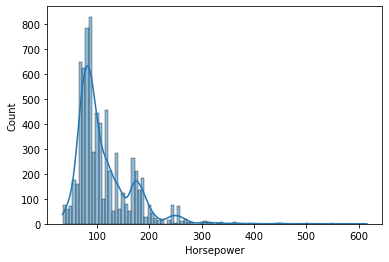

In [54]:
# Running a loop for each Column and getting a corresponding histogram.. 
# we did this earlier but this will allow to pull individual histogram for presentation if needed
# Univariate Analysis
for ea in number_columns:
    plt.figure() #Note, this is to make a new plot each loop (otherwise, all data would show on one plot)
    sns.histplot(df[ea],kde=True)
    

Observations:

Years - ranges from 1990's to almost 2020 (left skewed) - bulk of years is newer than 2010 around 2013-2016-ish 

KM-driven - right skewed- good to see no zero/negative values - 

Price - the bulk in the 0-20 range and some between 20-40 

Mileage (i.e. mpg) - looks fairly balanced and Normal distribution

Engine Size = skewed right - bulk of engines between 1000 and 2000 

HP - very similar pattern to Engine_Size - Expect Collinearity and the need to drop one of these columns 



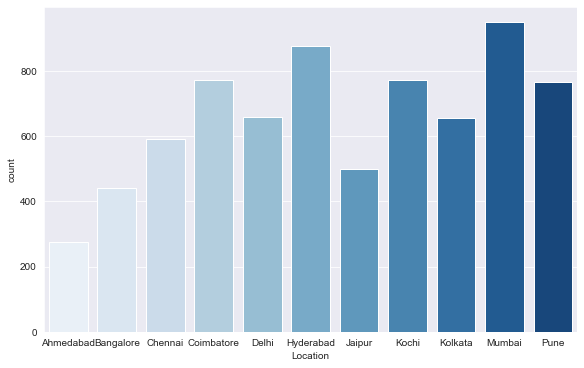

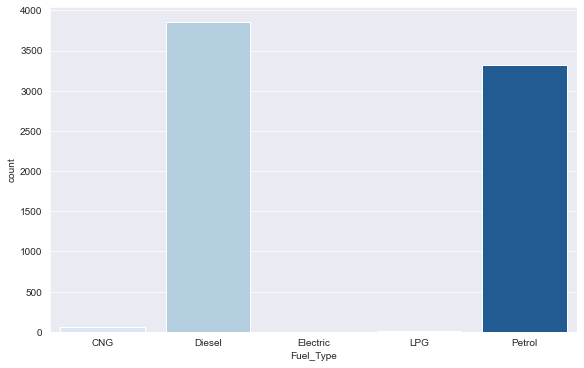

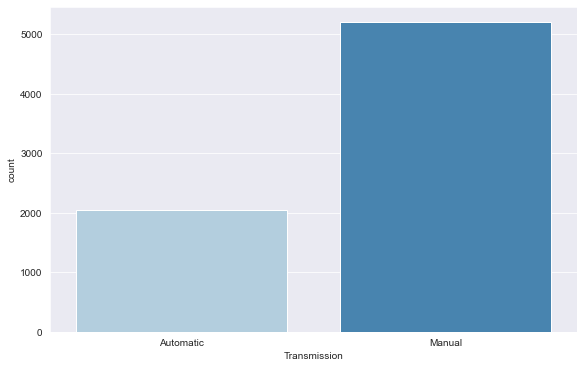

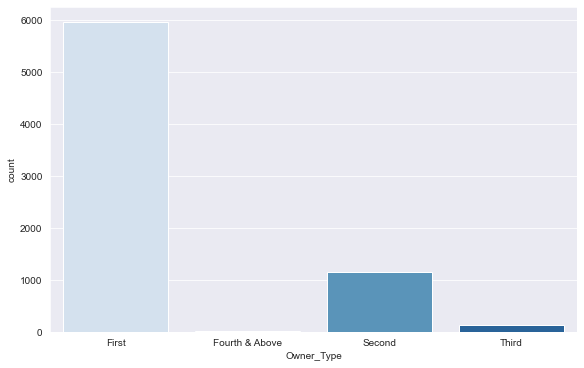

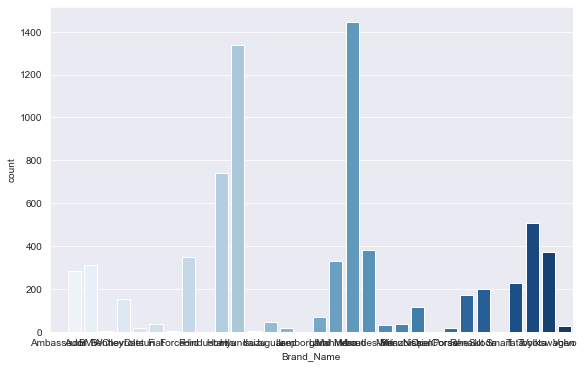

In [55]:
# running a loop through each categorical column and plotting a countplot
for ea in category_columns:
    plt.figure(figsize=(8,5), constrained_layout=True) #change size and constrained_layout True due to overlapping x-axis label
    sns.set_style("darkgrid")
    sns.countplot(df[ea], palette='Blues')

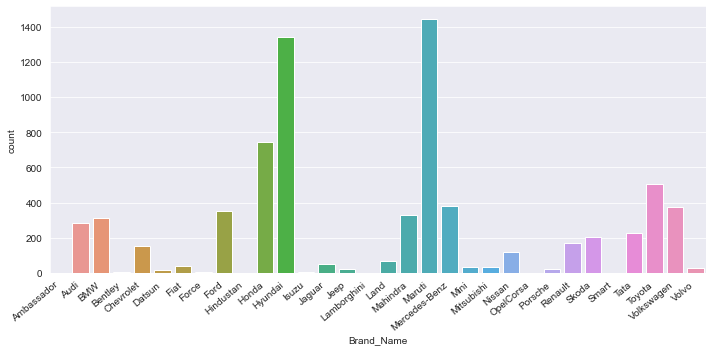

In [56]:
plt.figure(figsize=(10,5))
#sns.countplot(df['Brand_Name'])
ax = sns.countplot(df['Brand_Name'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [57]:
# This loop will allow to run a stripplot 'scatter' for each category combination.. then we can quickly go through
# the plots and pick out the correlations that look noteworthy and require further digging with different types of plots.
# for ea in number_columns: # for each column in the dataset
#     for each in number_columns: # run through each column again to plot against all the other columns
#         plt.figure() # create a new plot each loop
#         sns.stripplot(df[ea],df[each],jitter=True)

<AxesSubplot:>

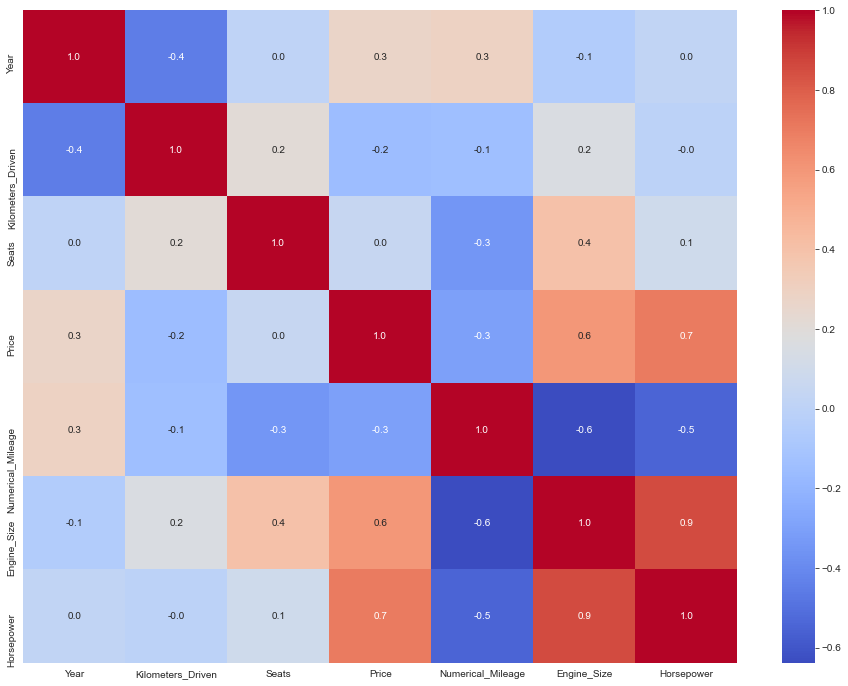

In [58]:
corr = df[number_columns].corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap='coolwarm',
            fmt='.1f',
            xticklabels=corr.columns,
            yticklabels=corr.columns)

High Positive Correlation - Price vs. Engine_size; Price vs. Horsepower; Engine_Size vs. Horsepower (Therefore, we will likely need to get rid of one, either Engine_Size or Horsepower because they seem linear) 

Strong Negative Correlation - Mileage (e.g. mpg) vs. Engine_Size; Mileage vs. Horsepower


In [59]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name,Numerical_Mileage,Engine_Size,Horsepower
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,15.20,1968.0,140.80


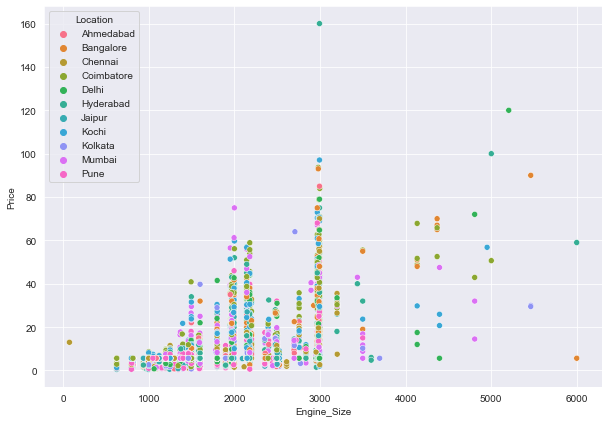

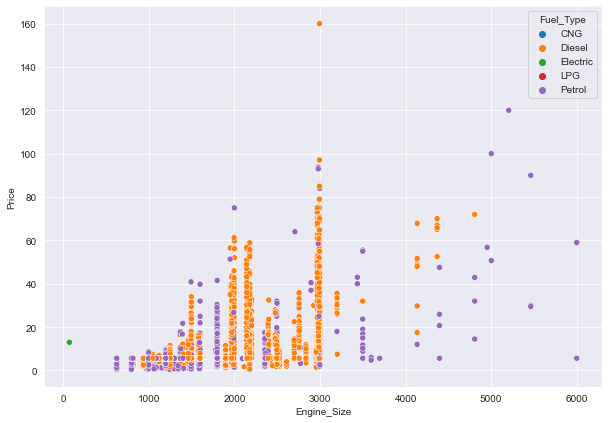

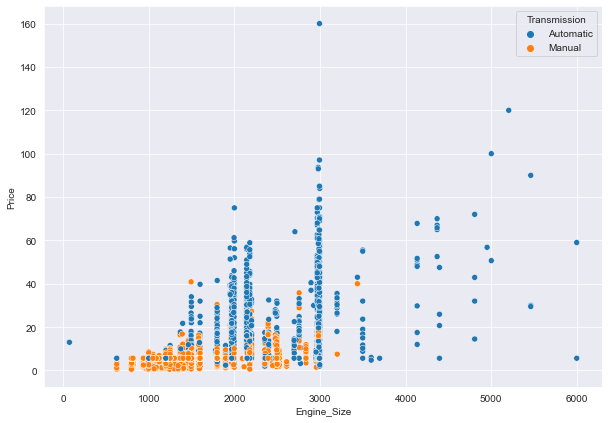

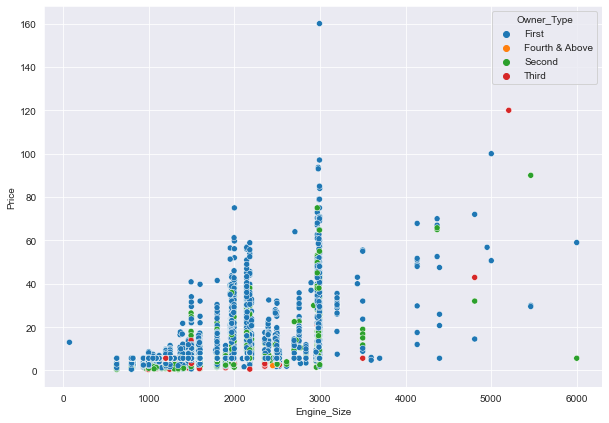

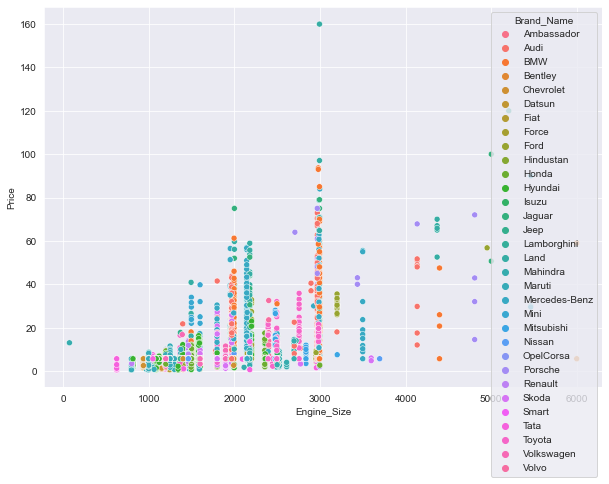

In [60]:
# Lets look at visualizing the relationship betwen Price (dependent) and Engine Size (independent)
for ea in category_columns:
    plt.figure(figsize=(10,7))
    sns.scatterplot(y='Price', x='Engine_Size', hue=ea, data=df);

Observations:

Seeing mostly Diesel/Petrol vehicles 

Looks like Automatic vehicles dominate the market and command higher prices 

Majority of vehicles are 1st and 2nd Owners 

Two Third Owner (red dot) outliers - is interesting - there must be something special about these vehicles to make them so valuable

Ignore the Price vs Engine Size with Car_Model Hue - too many Hue values 

In [61]:
# From Scatterplots, it appears that there are mostly Diesel/Petrol vehicles 
# Run value_counts to check and confirm
# Yes those two are predominant - Also there are very few Electric (2) and LPG (12) vehicles (possibly delete these rows??)
df['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

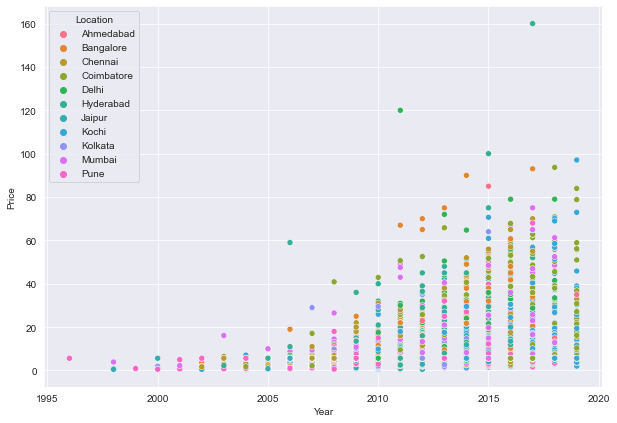

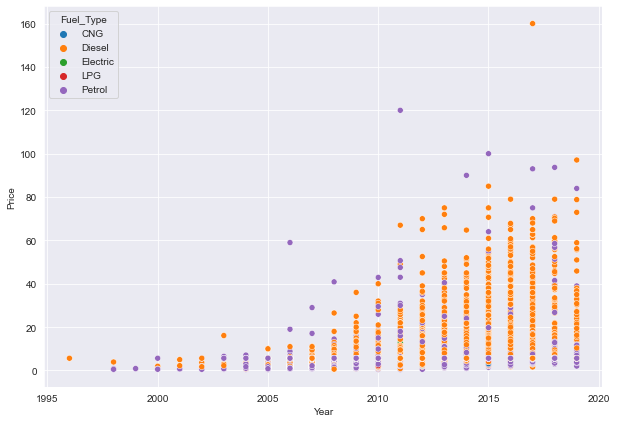

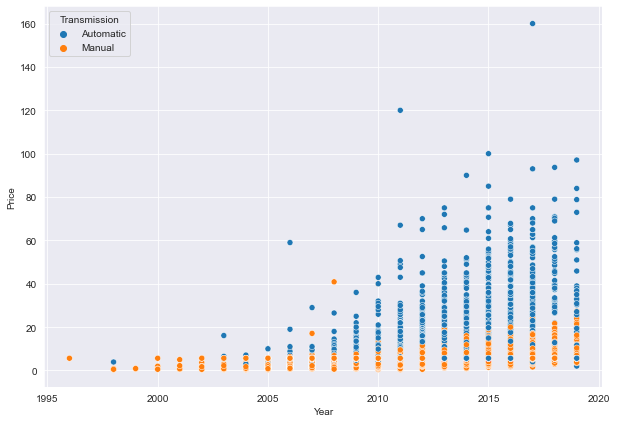

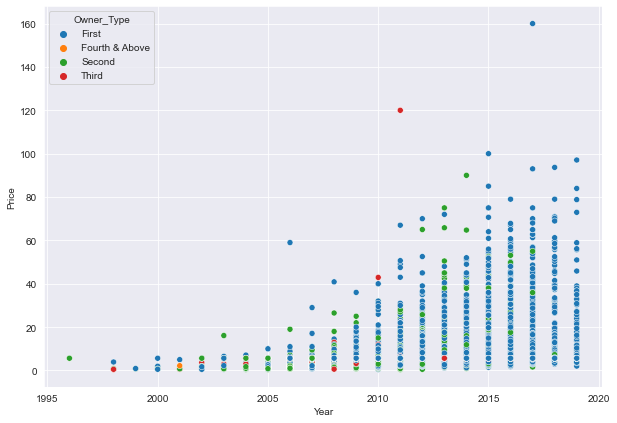

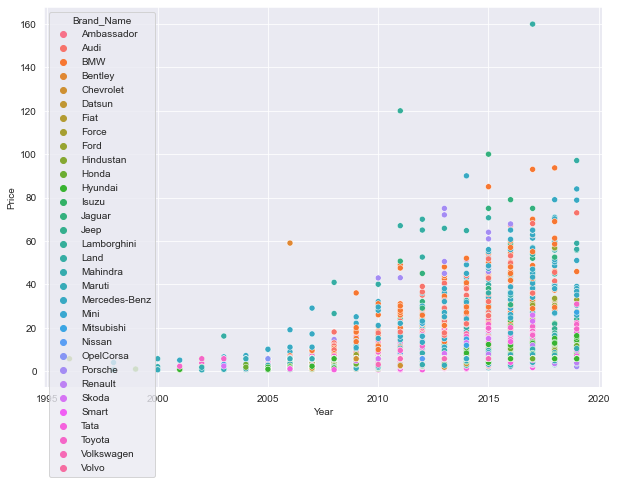

In [62]:
# Lets look at visualizing the relationship betwen Price (dependent) and Year (independent)
for ea in category_columns:
    plt.figure(figsize=(10,7))
    sns.scatterplot(y='Price', x='Year', hue=ea, data=df);

Pricing trends up with year - 4 noteable 'higher price' outliers (green dots) (either Delhi or Hyderabad) - possible trend with light purple (Mumbai or Pune) being lower in the spread (unsure)

Additional confidence in Autos being dominant in count and pricing - in recent years (Manuals dominate overall)



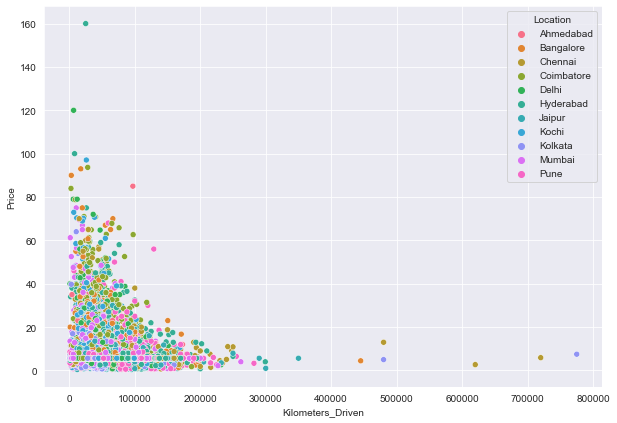

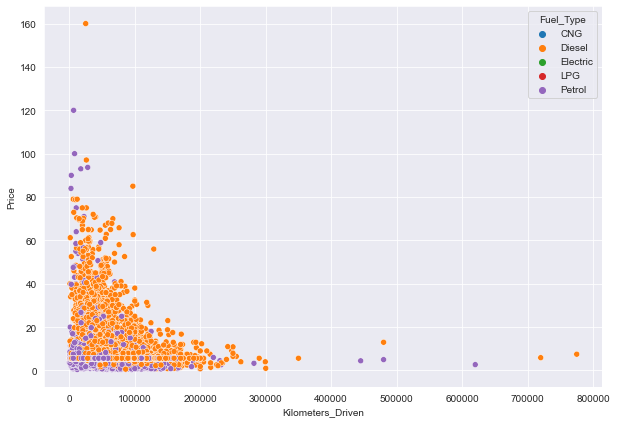

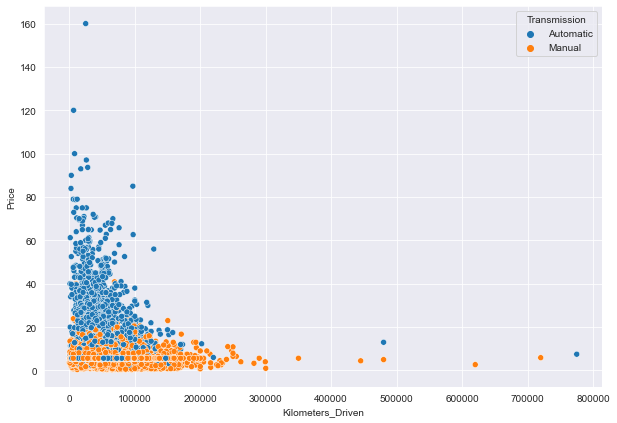

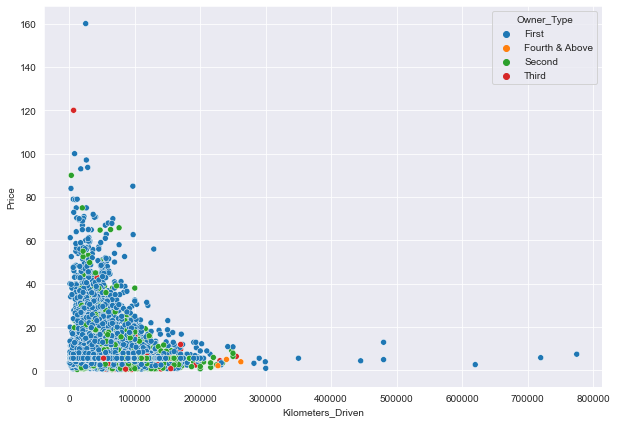

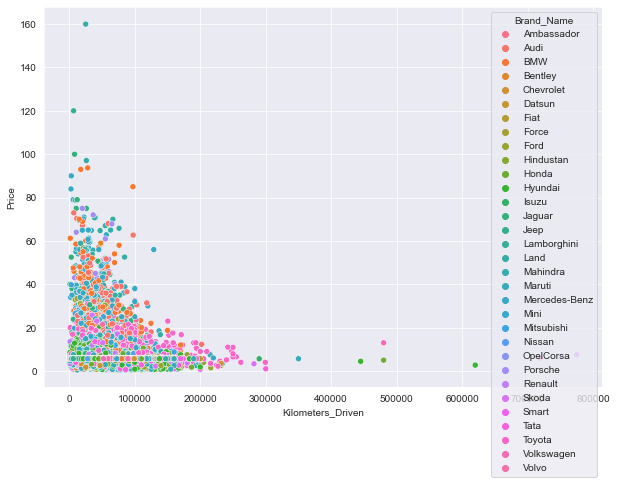

In [63]:
# Lets look at visualizing the relationship betwen Price (dependent) and Kilometers Driven (independent)
for ea in category_columns:
    plt.figure(figsize=(10,7))
    sns.scatterplot(y='Price', x='Kilometers_Driven', hue=ea, data=df);

Negative Correlation with km-driven (i.e. more miles, less value) 

Diesels Hold their value better than Petrol 



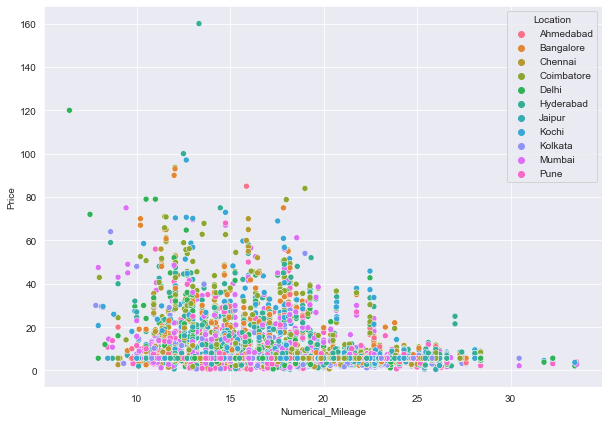

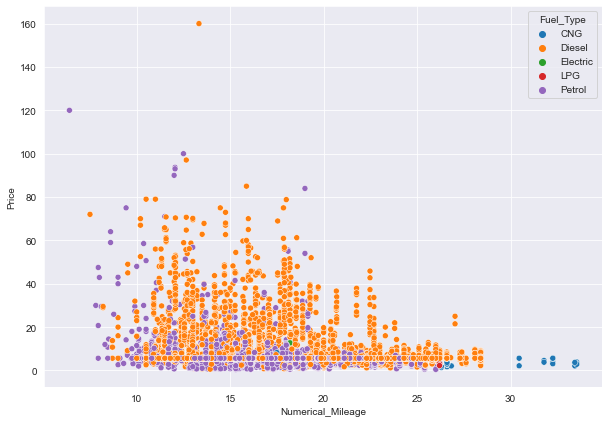

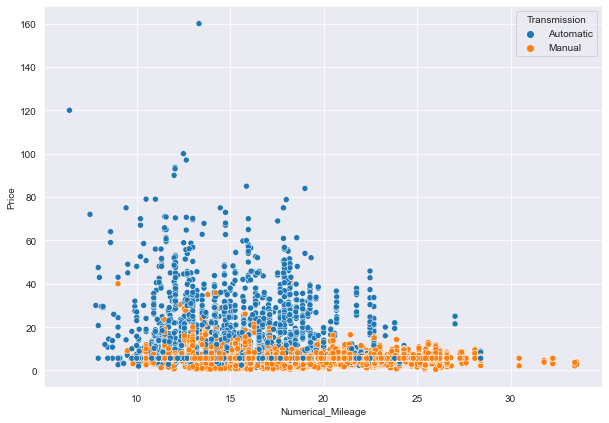

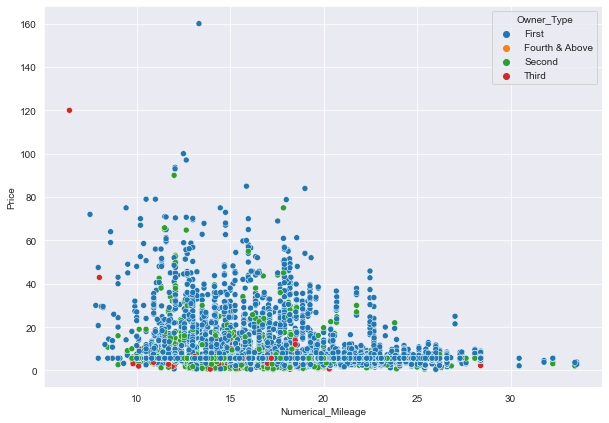

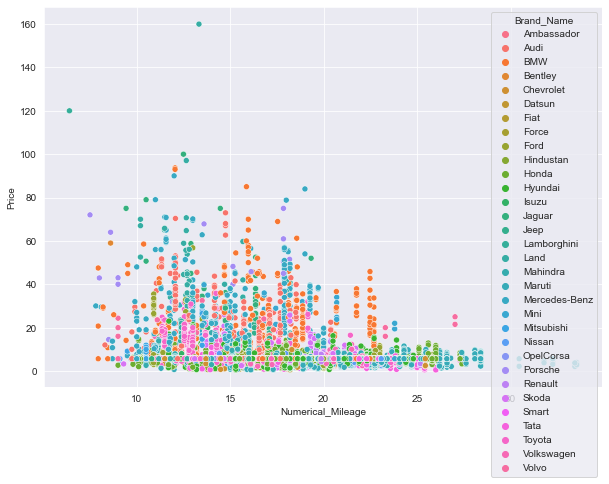

In [64]:
# Lets look at visualizing the relationship betwen Price (dependent) and Numerical_Mileage (i.e. mpg) (independent)
for ea in category_columns:
    plt.figure(figsize=(10,7))
    sns.scatterplot(y='Price', x='Numerical_Mileage', hue=ea, data=df);

Negative correlation - higher mileage leads to lower value 

Intuitively this makes sense because higher mileage vehicles have smaller engines - This is inversely correlated to Larger Engines = larger values



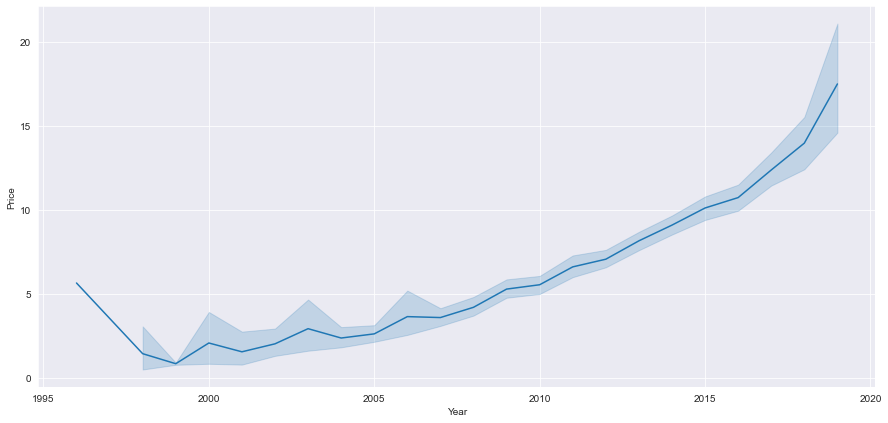

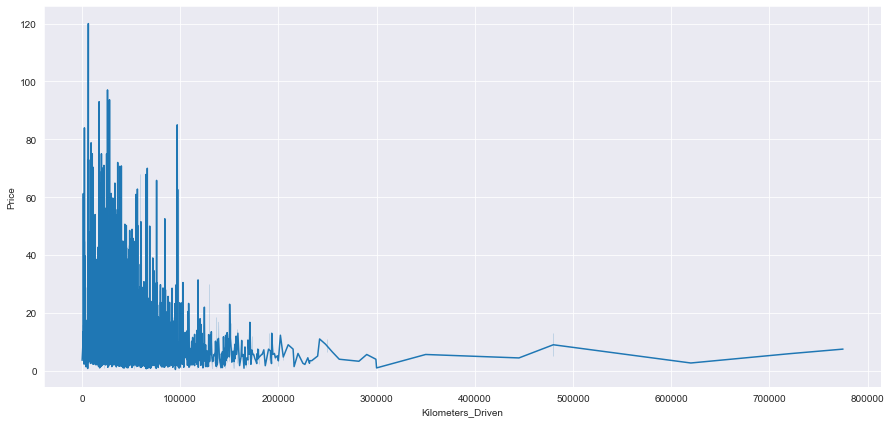

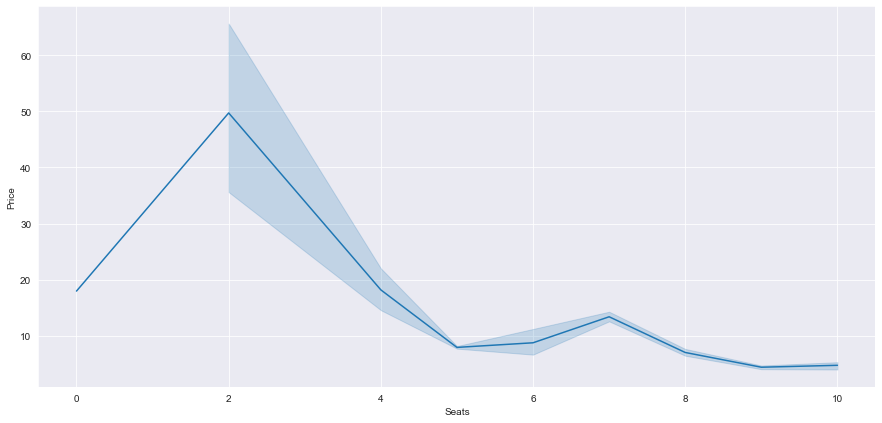

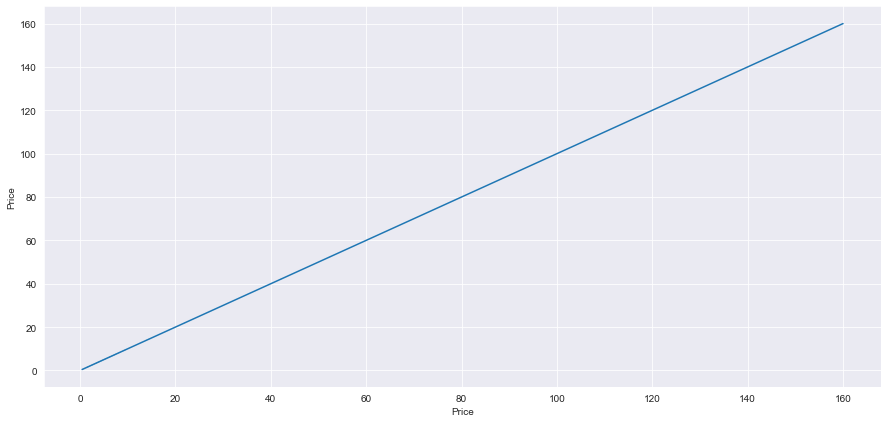

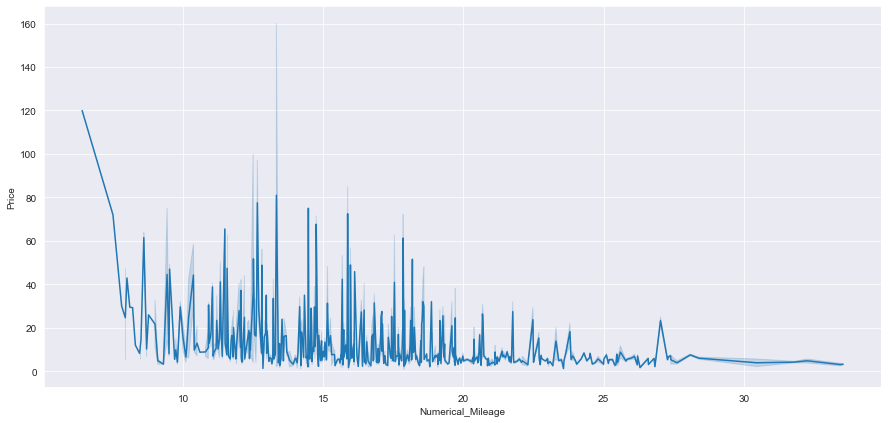

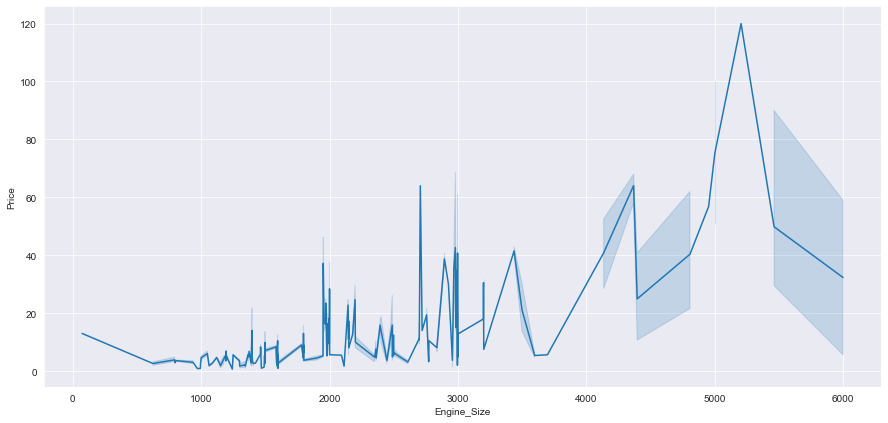

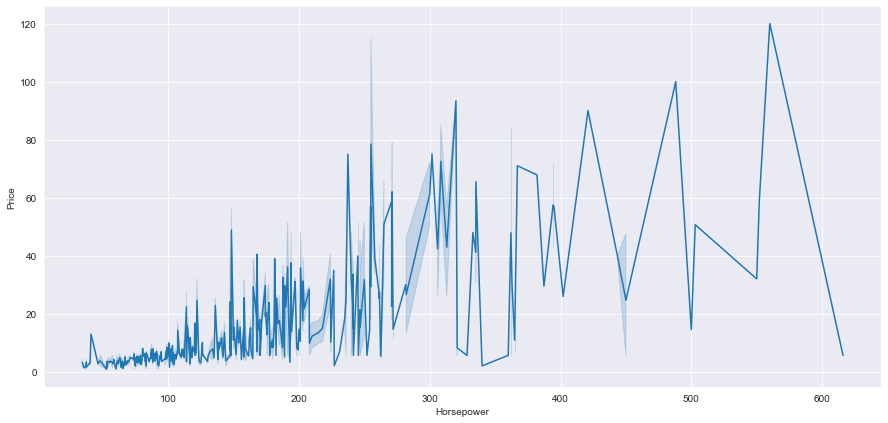

In [65]:
for each in number_columns:
    plt.figure(figsize=(15,7))
    sns.lineplot(x=each, y='Price', data=df);

<AxesSubplot:xlabel='Year', ylabel='Price'>

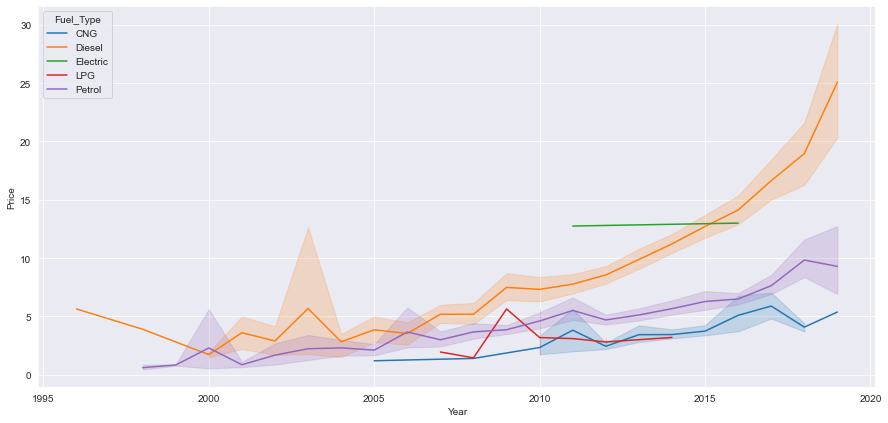

In [66]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price', data=df, hue='Fuel_Type')

<AxesSubplot:xlabel='Year', ylabel='Price'>

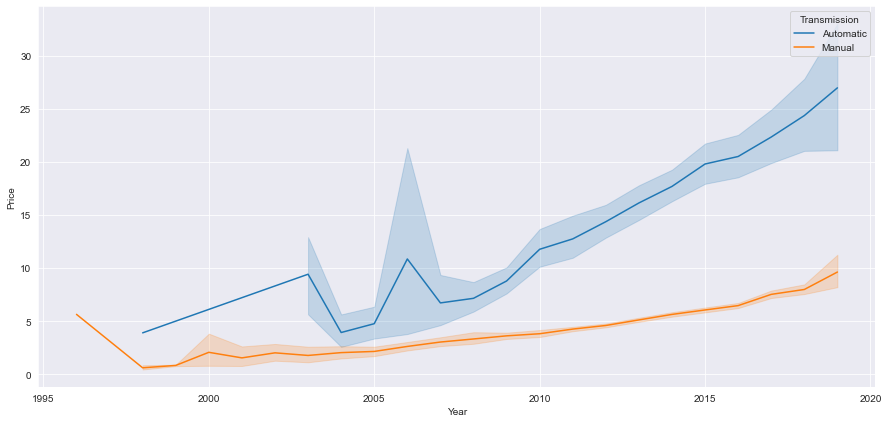

In [67]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price', data=df, hue='Transmission')

<AxesSubplot:xlabel='Year', ylabel='Price'>

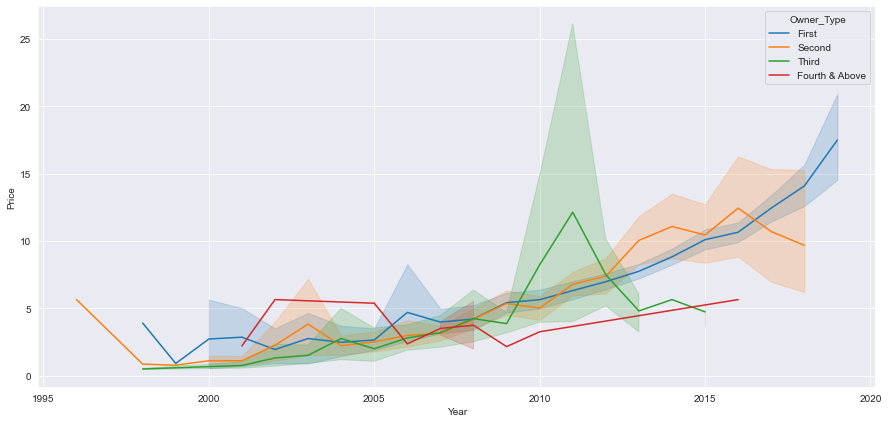

In [68]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price', data=df, hue='Owner_Type', hue_order=['First','Second','Third','Fourth & Above'])

In [69]:
category_columns

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand_Name']

In [70]:
number_columns

['Year',
 'Kilometers_Driven',
 'Seats',
 'Price',
 'Numerical_Mileage',
 'Engine_Size',
 'Horsepower']

<AxesSubplot:xlabel='Year', ylabel='Brand_Name'>

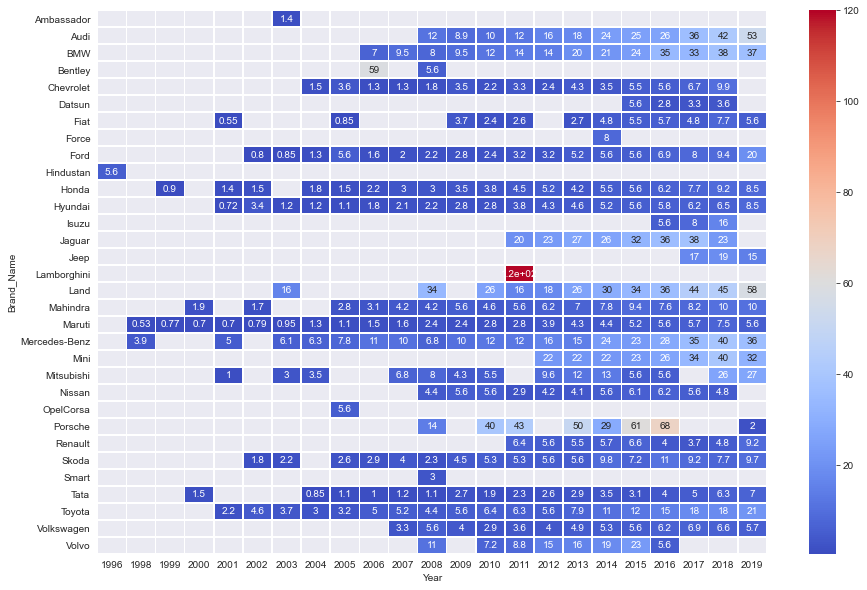

In [71]:
df_brand = df.pivot_table(index = 'Brand_Name', columns= 'Year', values='Price', aggfunc=np.median)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_brand, cmap='coolwarm', linewidths=.5, annot=True, ax=ax)

Observations: 

Bentley, Lamborghini and Porsche are outliers - high-end vehicles 

Most vehicles increase in value as they become newer

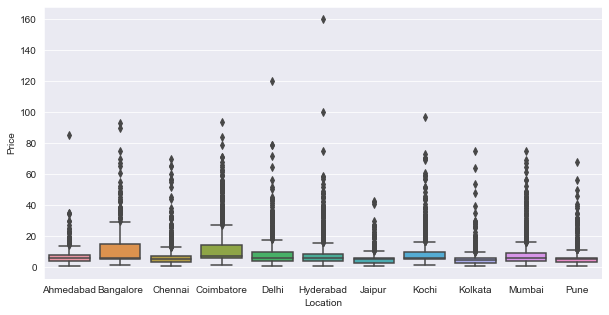

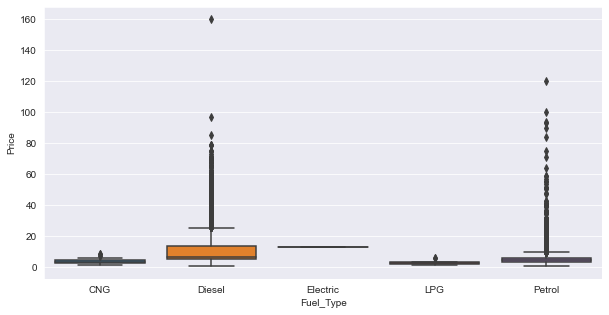

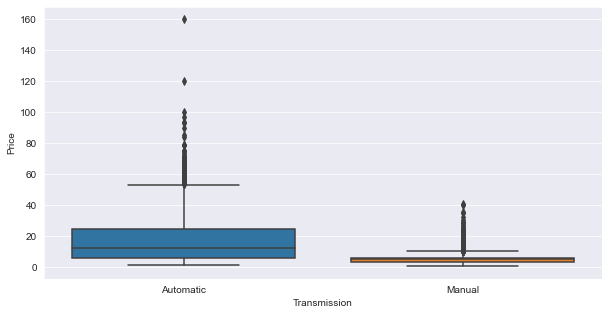

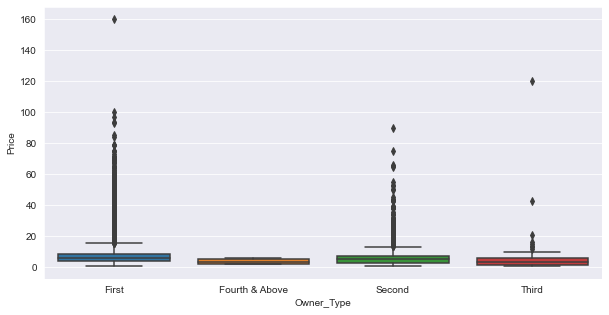

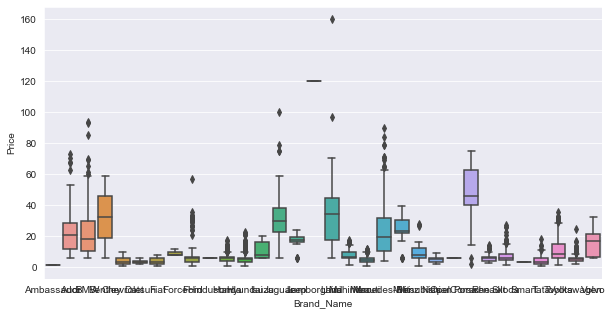

In [72]:
for each in category_columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[each],df['Price'])

Bangalore and Coimbatore generally have higher priced vehicles

Chennai, Kolkata and Puner generally have lower priced vehicles 

Diesel vehicles are generally higher in price

Still considering removing Electric and LPG indices in the dataset as they aren't contributing 

Automatics are generally higher priced than Manuals

Vehicles generally lose value as they age - Not so much First to Second Owners but definately for 3+ Owners



Outliers Treatment

In [73]:
# Two functions to deal with outliers
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [74]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
numerical_col

['Year',
 'Kilometers_Driven',
 'Seats',
 'Price',
 'Numerical_Mileage',
 'Engine_Size',
 'Horsepower']

In [75]:
# Treating the outliers 
df = treat_outliers_all(df, numerical_col)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name,Numerical_Mileage,Engine_Size,Horsepower
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.750,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.500,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011.0,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.500,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012.0,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,5.0,6.000,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,15.225,Audi,15.20,1968.0,140.80


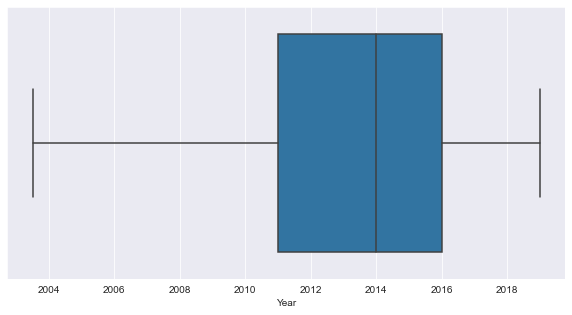

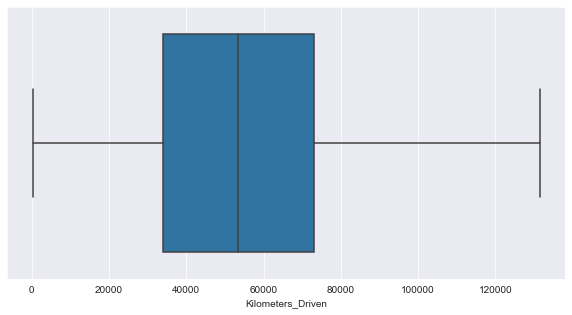

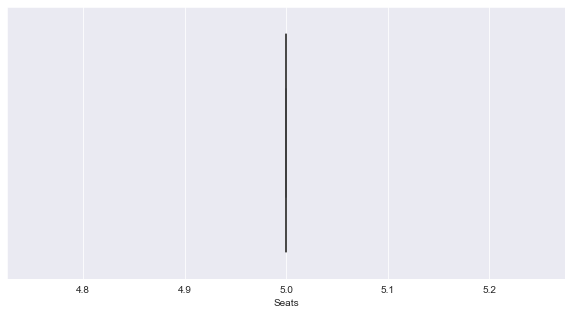

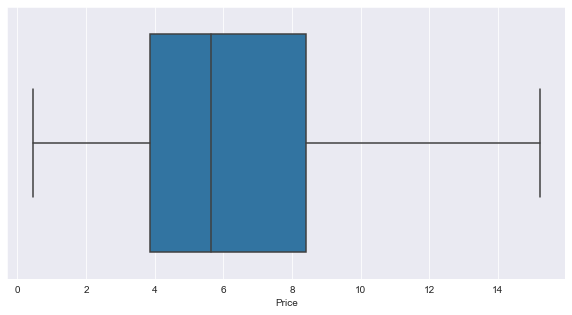

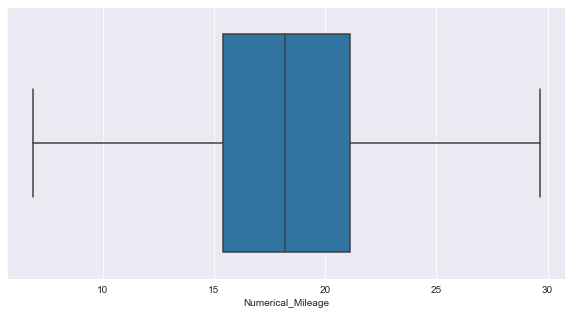

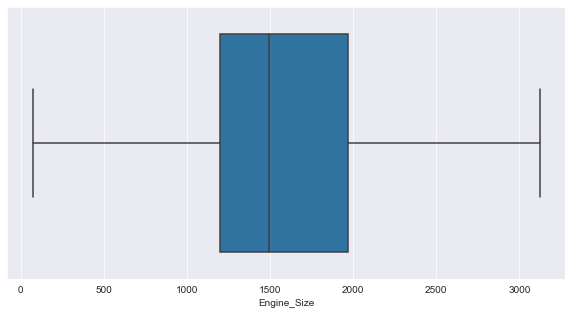

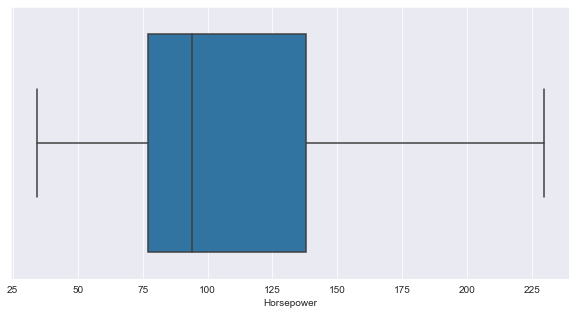

In [76]:
# Confirming all of the outliers have been taken care of
for ea in number_columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[ea])

In [77]:
X = df.drop(['Name','Price','Mileage', 'Engine','Power' ], axis=1) 

In [78]:
X.describe()

,Year,Kilometers_Driven,Seats,Numerical_Mileage,Engine_Size,Horsepower
count,7253.000000,7253.000000,7253.0,7253.000000,7253.000000,7253.000000
mean,2013.380946,56263.233834,5.0,18.337528,1608.226941,110.402768
std,3.198739,30176.008137,0.0,4.110669,563.680643,45.948236
min,2003.500000,171.000000,5.0,6.850000,72.000000,34.200000
25%,2011.000000,34000.000000,5.0,15.400000,1198.000000,77.000000
50%,2014.000000,53392.000000,5.0,18.200000,1493.000000,94.000000
75%,2016.000000,73000.000000,5.0,21.100000,1968.000000,138.030000
max,2019.000000,131500.000000,5.0,29.650000,3123.000000,229.575000


In [79]:
# Creating Dummies for all of the Categorical Values
X = pd.get_dummies(X, columns = category_columns, drop_first=True)

In [80]:
y = df['Price']

Choose Model, Train and Evaluate

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)

In [119]:
mean_absolute_error(y_test, pred)

1.560045534215943

In [84]:
# RMSE (Root Mean Square Error)
mean_squared_error(y_test, pred)**0.5

2.177296102184451

In [85]:
# 0.74 r-squared score initially - This is good, but I will try to increase this value to > 0.8  
r2_score(y_test, pred)

0.7411699463470406

In [86]:
y_intercept = linearregression.intercept_
f"The y-intercept is {y_intercept}" 

'The y-intercept is -841.1534278739897'

In [87]:
coefficients = linearregression.coef_
f"The coefficients are: \
{coefficients}"

'The coefficients are: [ 4.20838631e-01 -6.97175953e-06 -1.66946117e-10 -1.02972164e-01\n  7.00227345e-04  2.62606560e-02  2.07587076e-01  5.43803854e-03\n  3.07277027e-01 -5.66293786e-01  2.90863179e-01 -1.19822152e-01\n -1.64460187e-01 -9.11786138e-01 -9.49051501e-02 -6.09906721e-02\n  9.93398847e-01  7.44376219e+00 -1.03181341e-01 -1.80491694e-01\n -6.92513344e-01  9.10899544e-01 -1.21179559e-01 -5.57783385e-01\n  1.51497132e+00  1.07881307e+00  5.07036723e+00 -2.16800662e+00\n -2.45734211e+00 -2.03152987e+00  6.30529119e-01 -1.62538263e+00\n -7.21644966e-16 -1.57462243e+00 -1.29718262e+00 -3.27442585e+00\n  9.24272106e-01  1.37785642e+00  3.91158512e+00  2.56499349e+00\n -1.66194652e+00 -1.15358530e+00  1.02299195e+00  4.02795613e+00\n -7.79504024e-01 -1.78484313e+00  2.24253299e+00  1.95995507e+00\n -1.71605639e+00 -1.22733828e+00 -4.44089210e-16 -2.85479245e+00\n  3.03969522e-01 -1.81061943e+00  7.86384133e-01]'

# Now looking at Model Performances

# Observation
MAE of +/- 1.526 Lakh = 152,600 Indian Rupees equates to +/- $2,072 

This doesn't seem too bad, but probably can be improved with refinement of the Model

In [89]:
# Training Score
training_score = linearregression.score(X_train, y_train)
f'The Training Score is {training_score}'

'The Training Score is 0.7231033465541299'

In [90]:
# Testing Score
testing_score = linearregression.score(X_test, y_test)
f'The Testing Score is {testing_score}'

'The Testing Score is 0.7411699463470406'

# Statsmodels 
# Also still suspect that HP and engine size are colinear and removing one will improve the model

In [91]:
# Using the OLS (ordinary least squares method)
import statsmodels.api as sm

X = sm.add_constant(X, has_constant='add')

olsmod0 = sm.OLS(y_train, X_train)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     257.3
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        15:20:15   Log-Likelihood:                -11213.
No. Observations:                5077   AIC:                         2.253e+04
Df Residuals:                    5025   BIC:                         2.287e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

# Observations: 
Coeff Column:
Price Decreases as km_driven and mileage increase

Price Increases as Engine Size and Horsepower increase

p-value column:
Year, km_driven, mileage, Engine Size, Horsepower, Transmission all are significant to the Dependent (price) variable

std err:

Ignoring seats because of a high value +5.692


# Multicollinearity
## Suspect that engine size and horsepower are too correlated

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                           0.000000
Year                            2.138076
Kilometers_Driven               1.939780
Seats                           0.000000
Numerical_Mileage               3.759603
Engine_Size                     8.842584
Horsepower                      8.064355
Location_Bangalore              2.483075
Location_Chennai                2.964252
Location_Coimbatore             3.504537
Location_Delhi                  3.115501
Location_Hyderabad              3.735442
Location_Jaipur                 2.677963
Location_Kochi                  3.501161
Location_Kolkata                3.132363
Location_Mumbai                 3.950603
Location_Pune                   3.462056
Fuel_Type_Diesel               31.130926
Fuel_Type_Electric              1.045182
Fuel_Type_LPG                   1.213444
Fuel_Type_Petrol               31.779829
Transmission_Manual             2.315510
Owner_Type_Fourth & Above       1.014798
Owner_Type_Second     

# Suspect Multicollinearity -  these are very similar and over 5.0

Engine_Size and Horsepower - both ~8

Fuel_Type_Diesel and Fuel_Type_Petrol both ~31


In [93]:
brand_list= []
for ea in X.columns:
    if ea.startswith('Brand_Name'):
        brand_list.append(ea)

# Now dropping high VIF scores one by one

In [94]:
#X_train1 = X_train.drop('Seats', axis=1) # drop Seats column - after trail and error - putting this back in
X_train1 = X_train.drop('Engine_Size', axis=1) # drop engine size
X_train1 = X_train1.drop('Fuel_Type_Diesel', axis=1) # now drop fuel_type also (note: has to be back out of x_train1)
#X_train1 = X_train1.drop(brand_list, axis=1) drop brand_list column - after trail and error - putting this back in
vif_series1 = pd.Series([variance_inflation_factor(X_train1.values,i) for i in range(X_train1.shape[1])],index=X_train1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Year                         2.146722
Kilometers_Driven            1.912056
Seats                        0.000000
Numerical_Mileage            3.096666
Horsepower                   4.876491
Location_Bangalore           2.485691
Location_Chennai             2.982222
Location_Coimbatore          3.572163
Location_Delhi               3.143137
Location_Hyderabad           3.652918
Location_Jaipur              2.688020
Location_Kochi               3.564427
Location_Kolkata             3.092038
Location_Mumbai              3.933690
Location_Pune                3.391003
Fuel_Type_Electric           1.013373
Fuel_Type_LPG                1.026839
Fuel_Type_Petrol             2.184497
Transmission_Manual          2.340167
Owner_Type_Fourth & Above    1.017405
Owner_Type_Second            1.191090
Owner_Type_Third             1.124960
Brand_Name_Audi                   inf
Brand_Name_BMW                    inf
Brand_Name_Bentley                inf
Brand_Name_Chev

In [95]:

# Adding back in the brand_name who's VIF value was less than 5
#brand_list = [e for e in brand_list if e not in ('Brand_Name_Bentley', 'Brand_Name_Force', 'Brand_Name_Hindustan', 'Brand_Name_Lamborghini', 'Brand_Name_OpelCorsa', 'Brand_Name_Smart'  )]


In [96]:
olsmod1 = sm.OLS(y_train, X_train1)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     265.9
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        15:20:16   Log-Likelihood:                -11227.
No. Observations:                5077   AIC:                         2.255e+04
Df Residuals:                    5027   BIC:                         2.288e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

# The previous VIF check shows the brand_names to be very High
# So let's remove all of them at once
# R2 stayed the same so let's leave Seats in the mix

In [97]:
X_train2 = X_train1.drop('Brand_Name_Hindustan', axis=1) # all of the brand columns that had NaN
X_train2 = X_train2.drop('Brand_Name_Smart', axis=1) # all of the brand columns that had NaN
X_train2 = X_train2.drop('Brand_Name_Audi', axis=1) # all of the brand columns that had high VIF values
X_train2 = X_train2.drop('Brand_Name_Maruti', axis=1) # all of the brand columns that had hight VIF values
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Year                              2.133081
Kilometers_Driven                 1.901173
Seats                        835233.902778
Numerical_Mileage                 3.085189
Horsepower                        4.282082
Location_Bangalore                2.484912
Location_Chennai                  2.982099
Location_Coimbatore               3.568199
Location_Delhi                    3.143123
Location_Hyderabad                3.652849
Location_Jaipur                   2.687987
Location_Kochi                    3.563405
Location_Kolkata                  3.091766
Location_Mumbai                   3.932398
Location_Pune                     3.389625
Fuel_Type_Electric                1.013302
Fuel_Type_LPG                     1.026574
Fuel_Type_Petrol                  2.128847
Transmission_Manual               2.201558
Owner_Type_Fourth & Above         1.017350
Owner_Type_Second                 1.190577
Owner_Type_Third                  1.124783
Brand_Name_BMW     

In [98]:
olsmod2 = sm.OLS(y_train, X_train2)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     261.6
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        15:20:17   Log-Likelihood:                -11295.
No. Observations:                5077   AIC:                         2.269e+04
Df Residuals:                    5028   BIC:                         2.301e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

# The R-squared performance went down - Therefore, stick with olsmod1 and X-train1. 

In [99]:
X_train3 = X_train2.drop('Seats', axis=1) # drop Seats column
X_train3 = X_train3.drop('Fuel_Type_Electric', axis=1) # drop Seats column
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

Year                         205.770267
Kilometers_Driven              6.711663
Numerical_Mileage             58.884608
Horsepower                    28.279905
Location_Bangalore             2.645404
Location_Chennai               3.249754
Location_Coimbatore            3.937298
Location_Delhi                 3.462634
Location_Hyderabad             4.135862
Location_Jaipur                2.884781
Location_Kochi                 3.927716
Location_Kolkata               3.381235
Location_Mumbai                4.519298
Location_Pune                  3.773046
Fuel_Type_LPG                  1.027156
Fuel_Type_Petrol               3.908691
Transmission_Manual            7.640312
Owner_Type_Fourth & Above      1.013370
Owner_Type_Second              1.336539
Owner_Type_Third               1.104426
Brand_Name_BMW                 1.670985
Brand_Name_Bentley             1.007149
Brand_Name_Chevrolet           1.106490
Brand_Name_Datsun              1.017863
Brand

In [100]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1077.
Date:                Fri, 07 May 2021   Prob (F-statistic):                        0.00
Time:                        15:20:17   Log-Likelihood:                         -11673.
No. Observations:                5077   AIC:                                  2.344e+04
Df Residuals:                    5030   BIC:                                  2.375e+04
Df Model:                          47                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

# Adj R2 went up to 0.909 so much better - May need to check for Over-fitting

In [101]:
X_train4 = X_train3.drop('Transmission_Manual', axis=1) # Using X_train2 which has 'Year' and now dropping 'Numerical Mileage'
vif_series4 = pd.Series([variance_inflation_factor(X_train4.values,i) for i in range(X_train4.shape[1])],index=X_train4.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series4))

Series before feature selection: 

Year                         194.589324
Kilometers_Driven              6.589927
Numerical_Mileage             58.679731
Horsepower                    24.264082
Location_Bangalore             2.645014
Location_Chennai               3.249423
Location_Coimbatore            3.934669
Location_Delhi                 3.462634
Location_Hyderabad             4.133900
Location_Jaipur                2.884728
Location_Kochi                 3.927027
Location_Kolkata               3.375382
Location_Mumbai                4.516500
Location_Pune                  3.771929
Fuel_Type_LPG                  1.027130
Fuel_Type_Petrol               3.907900
Owner_Type_Fourth & Above      1.013359
Owner_Type_Second              1.336509
Owner_Type_Third               1.104405
Brand_Name_BMW                 1.651033
Brand_Name_Bentley             1.007141
Brand_Name_Chevrolet           1.101361
Brand_Name_Datsun              1.017513
Brand_Name_Fiat                1.028931
Brand

In [102]:
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              1070.
Date:                Fri, 07 May 2021   Prob (F-statistic):                        0.00
Time:                        15:20:18   Log-Likelihood:                         -11739.
No. Observations:                5077   AIC:                                  2.357e+04
Df Residuals:                    5031   BIC:                                  2.387e+04
Df Model:                          46                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

# Adj R2 went down - Stick with Olsmod2 and X_train3

In [103]:
residual = olsres2.resid
np.mean(residual)

-0.0009728635797823011

# Mean of residuals is very close to Zero - This is GOOD

In [104]:
fitted=olsres2.fittedvalues

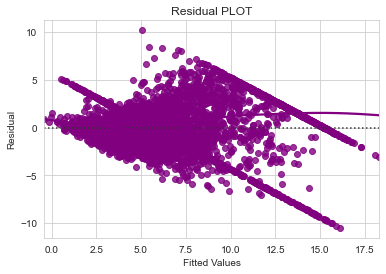

In [105]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

# now check Normality

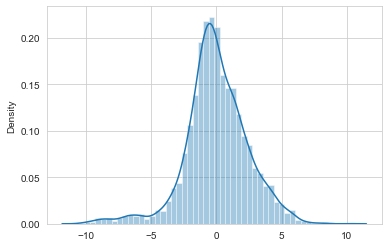

In [106]:
sns.distplot(residual)
plt.show()

# A distplot of the residuals appears to be mostly normal - slight skew to the left

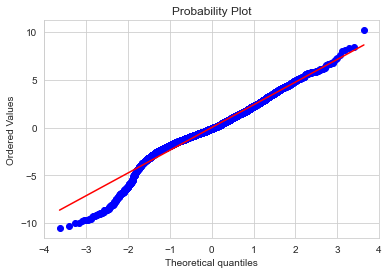

In [107]:
import pylab
import scipy.stats as stats
stats.probplot(residual, dist='norm', plot=pylab)
plt.show()

# Probability Plot approximately follows a straight line

In [108]:
stats.shapiro(residual)

ShapiroResult(statistic=0.968924343585968, pvalue=8.720625834513094e-32)

TEST for Homoscedasticity

In [109]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train3)
lzip(name, test)

[('F statistic', 1.0503127124576648), ('p-value', 0.11023207155342987)]

# Since p-value > 0.05, the residuals are homoscedastic

# Note: We also see this above in the Residuals Plot

In [110]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.lin

In [111]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 'best',forward=True,
           floating=False, scoring= 'r2',
           verbose=2,
           cv=5)

 # Perform SFFS - using X_train3 from olsmod2 which was the best performing model
sfs1 = sfs1.fit(X_train3, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    0.2s finished

[2021-05-07 15:20:22] Features: 1/47 -- score: 0.5234575983798166[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.2s finished

[2021-05-07 15:20:23] Features: 2/47 -- score: 0.638843329508439[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished

[2021-05-07 15:20:23] Features: 3/47 -- score: 0.6517421911694856[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished

[2021-05-07 15:20:30] Features: 28/47 -- score: 0.7061830534646594[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished

[2021-05-07 15:20:31] Features: 29/47 -- score: 0.706378824076148[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished

[2021-05-07 15:20:31] Features: 30/47 -- score: 0.7065039560739987[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2021-05-07 15:20:31] Features: 31/4

In [112]:
feat_cols = list(sfs1.k_feature_idx_)

In [113]:
X_train_final = X_train3[X_train3.columns[feat_cols]]

In [114]:
X_test_final = X_test[X_train_final.columns]

In [115]:
X_test_final.head()

,Year,Kilometers_Driven,Numerical_Mileage,Horsepower,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,Brand_Name_BMW,Brand_Name_Bentley,Brand_Name_Chevrolet,Brand_Name_Datsun,Brand_Name_Fiat,Brand_Name_Ford,Brand_Name_Honda,Brand_Name_Hyundai,Brand_Name_Isuzu,Brand_Name_Jeep,Brand_Name_Land,Brand_Name_Mahindra,Brand_Name_Mercedes-Benz,Brand_Name_Mini,Brand_Name_Nissan,Brand_Name_Renault,Brand_Name_Skoda,Brand_Name_Tata,Brand_Name_Toyota,Brand_Name_Volkswagen
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2954,2016.0,30000,20.4,81.80,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6520,2016.0,105000,23.2,73.94,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6036,2009.0,131500,13.8,68.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6251,2014.0,33750,15.6,70.02,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6735,2017.0,35000,24.3,88.50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
linearregression.fit(X_train_final, y_train)

print(linearregression.intercept_)
print(linearregression.coef_)

predicted = linearregression.predict(X_train_final)
pred = linearregression.predict(X_test_final)


-796.6153268902042
[ 3.99392413e-01 -8.74459422e-06 -1.40961617e-01  3.83625342e-02
  4.35047184e-01 -5.46219672e-01  3.60021945e-01 -8.47676442e-01
 -1.02328206e-01 -1.42235190e+00 -1.55038867e+00 -1.02402145e+00
 -9.20605988e-02 -5.79498572e-01  6.89687708e-01  4.67444543e+00
 -1.43477059e+00 -1.25209044e+00 -1.40359206e+00 -8.83815830e-01
 -9.05088116e-01 -5.63303443e-01 -2.73999534e+00  1.34710142e+00
  2.31860363e+00 -9.81282119e-01  7.56294881e-01  4.08102133e+00
 -9.82443941e-01 -9.23421357e-01 -8.52246378e-01 -1.94754755e+00
  1.03945513e+00 -1.12416263e+00]


In [117]:
# r-squared on train and test
print(f'r^2 train: {r2_score(y_train, predicted)}')
print(f'r^2 test: {r2_score(y_test, pred)}')

r^2 train: 0.7118826782529426
r^2 test: 0.7331964851213422


In [118]:
# RMSE on train and test data
print(f'RMSE train: {mean_squared_error(y_train, predicted)**0.5}')
print(f'RMSE test: {mean_squared_error(y_test, pred)**0.5}')

RMSE train: 2.246869487728941
RMSE test: 2.2105783752231845


# RMSE for test and train are low and similar - therefore we aren't overfitting

# Olsres2 is a good predictor of Price